In [2]:
# Import Dependencies
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from utils.data_loader import load_mnist
from models.mnist_classifier import MnistClassifier

2025-03-02 20:52:19.721935: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740941539.734955   93101 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740941539.738624   93101 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-02 20:52:19.753128: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
print("CUDA Available:", tf.test.is_built_with_cuda())
print("GPU Available:", tf.config.list_physical_devices('GPU'))

CUDA Available: True
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


Training data shape: (43200, 28, 28, 1), Labels shape: (43200,)
Validation data shape: (10800, 28, 28, 1), Labels shape: (10800,)
Test data shape: (6000, 28, 28, 1), Labels shape: (6000,)


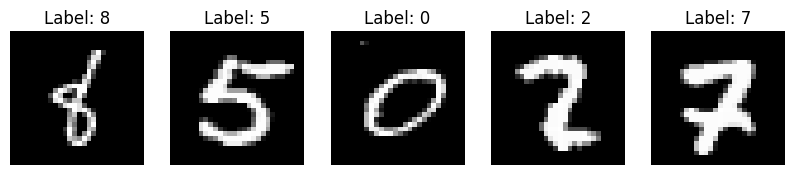

In [4]:
# Load MNIST dataset with normalization
X_full, y_full, X_test, y_test = load_mnist(normalize=True)

# First split: 10% test, 90% remaining (train + val)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X_full, y_full, test_size=0.1, random_state=42, stratify=y_full
)

# Second split: 80% train, 20% val from remaining 90%
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.2, random_state=42, stratify=y_train_val
)

# Print dataset shapes
print(f"Training data shape: {X_train.shape}, Labels shape: {y_train.shape}")
print(f"Validation data shape: {X_val.shape}, Labels shape: {y_val.shape}")
print(f"Test data shape: {X_test.shape}, Labels shape: {y_test.shape}")

# Display 5 random images from the training set
plt.figure(figsize=(10, 3))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_train[i].reshape(28, 28), cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()

In [5]:
# Function for training and evaluating an MNIST models.
def train_and_evaluate(model_type, X_train, y_train, X_val, y_val, X_test, y_test):

    # Reshape data for CNN
    if model_type == "cnn":
        X_train = X_train.reshape(-1, 28, 28, 1)
        X_val = X_val.reshape(-1, 28, 28, 1)
        X_test = X_test.reshape(-1, 28, 28, 1)

    # Reshape data for Random Forest (flatten images)
    if model_type == "rf":
        X_train = X_train.reshape(X_train.shape[0], -1)
        X_val = X_val.reshape(X_val.shape[0], -1)
        X_test = X_test.reshape(X_test.shape[0], -1)

    # Initialize classifier
    classifier = MnistClassifier(model_type)

    # Train the model (validation accuracy is calculated inside the model)
    classifier.train(X_train, y_train, X_val, y_val)

    print(f"Training completed for model: {model_type}")

    # Predict on the test set (final evaluation)
    y_test_pred = classifier.predict(X_test)
    test_accuracy = np.mean(y_test_pred == y_test)
    print(f"Final Accuracy on test data for {model_type}: {test_accuracy:.4f}")

    return test_accuracy


In [6]:
# Train and evaluate the Random Forest model
accuracy_rf = train_and_evaluate("rf", X_train, y_train, X_val, y_val, X_test, y_test)

Validation Accuracy (RF): 0.9670
Training completed for model: rf
Final Accuracy on test data for rf: 0.9655


/home/dmitry/.local/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1740941561.927736   93101 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13687 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080 Ti Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


Epoch 1/9


I0000 00:00:1740941565.005502   93431 service.cc:148] XLA service 0x7f848400a2e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1740941565.005554   93431 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3080 Ti Laptop GPU, Compute Capability 8.6
2025-03-02 20:52:45.025649: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1740941565.136954   93431 cuda_dnn.cc:529] Loaded cuDNN version 90300


  44/2700 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.2302 - loss: 2.1623     

I0000 00:00:1740941566.348877   93431 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2700/2700 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.8547 - loss: 0.4592 - val_accuracy: 0.9795 - val_loss: 0.0627
Epoch 2/9
2700/2700 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9730 - loss: 0.0908 - val_accuracy: 0.9840 - val_loss: 0.0461
Epoch 3/9
2700/2700 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9817 - loss: 0.0638 - val_accuracy: 0.9881 - val_loss: 0.0399
Epoch 4/9
2700/2700 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9857 - loss: 0.0465 - val_accuracy: 0.9858 - val_loss: 0.0527
Epoch 5/9
2700/2700 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9880 - loss: 0.0396 - val_accuracy: 0.9907 - val_loss: 0.0339
Epoch 6/9
2700/2700 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9895 - loss: 0.0342 - val_accuracy: 0.9910 - val_loss: 0.0319
Epoch 7/9
2700/2700 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9906 - loss: 0.0293 - val_accuracy: 0.9914 - val_loss: 0.0329
Epoch 8/9
2700/2700 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9913 - loss: 0.0291 - val_accura

2025-03-02 20:54:18.701993: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_47', 4 bytes spill stores, 4 bytes spill loads



188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Final Accuracy on test data for cnn: 0.9887


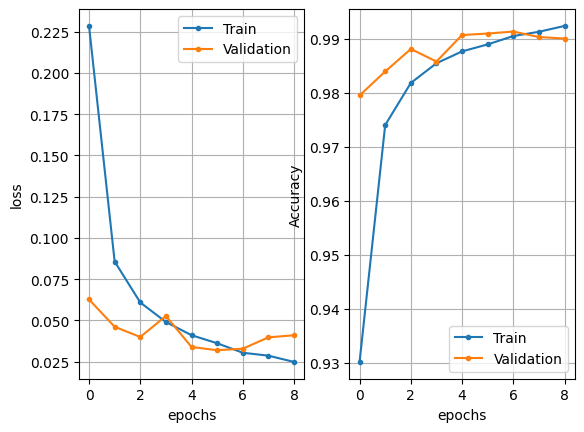

In [7]:
# Train and evaluate the CNN model
accuracy_cnn = train_and_evaluate("cnn", X_train, y_train, X_val, y_val, X_test, y_test)

/home/dmitry/.local/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/11
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7952 - loss: 0.6519 - val_accuracy: 0.9490 - val_loss: 0.1621
Epoch 2/11
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9408 - loss: 0.2004 - val_accuracy: 0.9663 - val_loss: 0.1166
Epoch 3/11
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9563 - loss: 0.1450 - val_accuracy: 0.9689 - val_loss: 0.1051
Epoch 4/11
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9621 - loss: 0.1239 - val_accuracy: 0.9706 - val_loss: 0.0969
Epoch 5/11
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9681 - loss: 0.1061 - val_accuracy: 0.9732 - val_loss: 0.0927
Epoch 6/11
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9692 - loss: 0.1008 - val_accuracy: 0.9726 - val_loss: 0.0927
Epoch 7/11
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9742 - loss: 0.0847 - val_accuracy: 0.9730 - val_loss: 0.0938
Epoch 8/11
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9755 - loss: 0.0808 - 

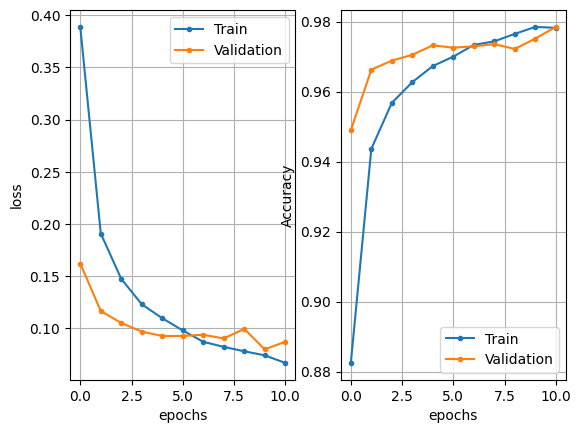

In [8]:
# Train and evaluate the Fully Connected Neural Network
accuracy_nn = train_and_evaluate("nn", X_train, y_train, X_val, y_val, X_test, y_test)